Importing Libraries

In [1]:
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skmultiflow.drift_detection import DDM
from skmultiflow.drift_detection.adwin import ADWIN
import warnings
from skmultiflow.metrics import WindowClassificationPerformanceEvaluator
warnings.filterwarnings('ignore')

Loading Data

In [2]:
df_incremental_d1 = pd.read_csv(r"E:\uOttawaTerm1\ML\Assign4\INSECTS-incremental_balanced_norm.csv")
df_gradual_d2 = pd.read_csv(r"E:\uOttawaTerm1\ML\Assign4\INSECTS-gradual_balanced_norm.csv")
df_abrupt_d3 = pd.read_csv(r"E:\uOttawaTerm1\ML\Assign4\INSECTS-abrupt_balanced_norm.csv")

In [3]:
df_incremental_d1

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055,ae-albopictus-female
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052,ae-albopictus-female
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020,cx-quinq-male
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718,ae-albopictus-female
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202,ae-aegypti-male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57013,0.562268,0.183415,0.375939,0.258558,0.509252,0.600390,0.490171,0.002612,0.033014,0.008796,...,0.004282,0.009679,0.008692,0.004108,0.018510,0.012258,0.004962,0.006172,0.005519,ae-albopictus-female
57014,0.240139,0.326005,0.006055,0.220982,0.293031,0.368863,0.314305,0.045538,0.079011,0.089466,...,0.014705,0.030068,0.010801,0.014773,0.011011,0.010857,0.017171,0.051595,0.090258,ae-aegypti-female
57015,0.205250,0.281994,0.217749,0.264718,0.390612,0.006439,0.323978,0.118622,0.119251,0.082268,...,0.018091,0.014782,0.009773,0.016811,0.073063,0.245475,0.192334,0.074523,0.020860,cx-quinq-female
57016,0.308834,0.425707,0.326710,0.397737,0.022402,0.011996,0.360777,0.012555,0.011269,0.039137,...,0.036967,0.009424,0.005501,0.008485,0.005072,0.009786,0.009940,0.013624,0.017133,cx-quinq-male


Converting Categorical data to numerical data(Using label encoding)

In [4]:
df_incremental_d1['class'] = LabelEncoder().fit_transform(df_incremental_d1['class'])
df_gradual_d2['class'] = LabelEncoder().fit_transform(df_gradual_d2['class'])
df_abrupt_d3['class'] = LabelEncoder().fit_transform(df_abrupt_d3['class'])

In [5]:
df_incremental_d1

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055,2
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052,2
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020,5
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718,2
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57013,0.562268,0.183415,0.375939,0.258558,0.509252,0.600390,0.490171,0.002612,0.033014,0.008796,...,0.004282,0.009679,0.008692,0.004108,0.018510,0.012258,0.004962,0.006172,0.005519,2
57014,0.240139,0.326005,0.006055,0.220982,0.293031,0.368863,0.314305,0.045538,0.079011,0.089466,...,0.014705,0.030068,0.010801,0.014773,0.011011,0.010857,0.017171,0.051595,0.090258,0
57015,0.205250,0.281994,0.217749,0.264718,0.390612,0.006439,0.323978,0.118622,0.119251,0.082268,...,0.018091,0.014782,0.009773,0.016811,0.073063,0.245475,0.192334,0.074523,0.020860,4
57016,0.308834,0.425707,0.326710,0.397737,0.022402,0.011996,0.360777,0.012555,0.011269,0.039137,...,0.036967,0.009424,0.005501,0.008485,0.005072,0.009786,0.009940,0.013624,0.017133,5


In [6]:
df_gradual_d2

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349,0
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880,0
2,0.458254,0.011934,0.290734,0.228966,0.108324,0.422456,0.334562,0.075886,0.055659,0.032657,...,0.014689,0.043372,0.038154,0.019074,0.013496,0.023259,0.085427,0.143533,0.107721,1
3,0.399140,0.452438,0.375610,0.500829,0.002449,0.606104,0.563900,0.011115,0.007772,0.005426,...,0.002710,0.011455,0.037303,0.308902,0.297547,0.099780,0.020431,0.005512,0.006190,1
4,0.418305,0.479065,0.397929,0.000868,0.511484,0.643908,0.604099,0.015001,0.007669,0.003962,...,0.003295,0.006972,0.010259,0.031866,0.212833,0.203114,0.100263,0.019290,0.012371,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,0.349471,0.400771,0.005798,0.333179,0.431198,0.546270,0.496879,0.034361,0.019016,0.061211,...,0.071119,0.232142,0.110718,0.044183,0.013570,0.007121,0.007556,0.007497,0.009246,3
24146,0.640327,0.174622,0.298338,0.396216,0.006706,0.486061,0.432158,0.012083,0.012982,0.049050,...,0.046233,0.024583,0.010133,0.009969,0.013310,0.008816,0.005726,0.018463,0.049414,3
24147,0.277232,0.324583,0.269065,0.357360,0.011804,0.438470,0.378477,0.018315,0.084183,0.029152,...,0.009210,0.012845,0.015609,0.006492,0.011520,0.022787,0.010899,0.008300,0.012211,3
24148,0.329867,0.379020,0.005716,0.316917,0.399384,0.039503,0.365419,0.076165,0.051042,0.335760,...,0.362278,0.388240,0.099521,0.022174,0.027390,0.025400,0.021686,0.015319,0.021907,3


In [7]:
df_abrupt_d3

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,2
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,2
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,4
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,2
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,0.376205,0.481608,0.341587,0.005883,0.555439,0.449868,0.535081,0.007482,0.004769,0.018222,...,0.027851,0.094857,0.095290,0.044267,0.008017,0.005021,0.006875,0.005422,0.008626,3
52844,0.907227,0.283415,0.401981,0.538330,0.006673,0.665257,0.644756,0.018815,0.014563,0.007784,...,0.004589,0.004021,0.004964,0.012643,0.050035,0.203125,0.130514,0.113380,0.038648,3
52845,0.417234,0.528923,0.374940,0.499970,0.001630,0.612408,0.594603,0.008641,0.006584,0.003708,...,0.004282,0.004831,0.026317,0.194038,0.200206,0.128182,0.032787,0.012716,0.010405,3
52846,0.379485,0.482561,0.341230,0.001819,0.442228,0.022463,0.446172,0.018756,0.012964,0.047095,...,0.073563,0.182334,0.221658,0.184219,0.053162,0.018325,0.011213,0.010824,0.020919,3


To create datatream after dropping class from dataframe

In [8]:
def get_X_Y(df):
    return df.drop(['class'],axis = 1), df['class'].to_numpy()
#dropping class variable and converting dataframe to numpy arrayto use as data stream

Function for NoChange Classifier 

In [19]:
class NoChangeClassifier():
    def __init__(self): 
        self.previous = 0 #initiating variable to 0
    def partial_fit(self,X, y, classes =None):
        self.previous = y[-1] #Setting class output to previous
        return self
    def predict_window(self,X):
        y_pred = [self.previous for i in range(len(X))]  #Predicting class 
        return y_pred
    def predict(self,X):
        y_pred = [self.previous for i in range(len(X))]  #Predicting class 
        return y_pred
    

Function for Majority Class Classifier

In [12]:
class MajorityClassClassifier():
    def __init__(self):
        self.class_frequency = {}  
        self.majority_class = -1   #Initiating class variable
    def partial_fit(self,X, y, classes =None):
        for i in Y:
            if self.majority_class == -1:
                self.majority_class=i
            if i in self.class_frequency:
                self.class_frequency[i] +=1
            else:
                self.class_frequency[i] =1
                
            if self.class_frequency[self.majority_class] <= self.class_frequency[i]:
                self.majority_class = i 
        return self
    def update_majority_class(self, Y):
        for i in Y:
            if self.majority_class == -1:
                self.majority_class=i
            if i in self.class_frequency:
                self.class_frequency[i] +=1
            else:
                self.class_frequency[i] =1
                
            if self.class_frequency[self.majority_class] <= self.class_frequency[i]:
                self.majority_class = i 
        return self

    def predict(self, X):
        y_pred = [self.majority_class for x in range(len(X))]
        return y_pred

# For INSECTS-incremental_balanced_norm dataset

In [10]:
X, Y = get_X_Y(df_incremental_d1)

Majority Class Classifier

Text(0, 0.5, 'Accuracy')

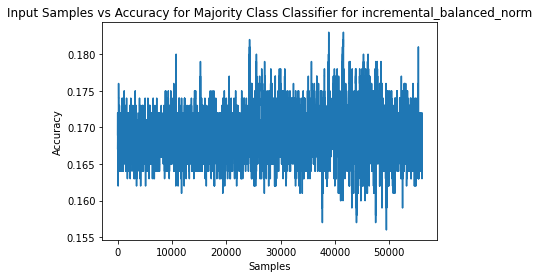

In [13]:
majorityClass = MajorityClassClassifier()
majorityClass.update_majority_class(Y[0:1000])
acc = []
for i in range(1,len(X)-1000):
    y_pred = majorityClass.predict(X[i:i+1000])
    acc.append(np.count_nonzero(y_pred == Y[i:i+1000])/len(y_pred))
    majorityClass.update_majority_class([Y[i+1000]])
plt.plot(acc)
plt.title("Input Samples vs Accuracy for Majority Class Classifier for incremental_balanced_norm")
plt.xlabel('Samples')
plt.ylabel('Accuracy')


No Change Classifier

In [22]:
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import SEAGenerator, ConceptDriftStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier,SAMKNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.meta import DynamicWeightedMajorityClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LearnPPNSEClassifier

# Create a stream
stream = DataStream(X,Y)
stream.prepare_for_use()   # Not required for v0.5.0+

# Setup the classifier
mcc = MajorityClassClassifier()
ncc = NoChangeClassifier()

# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=1000, n_wait=1000, batch_size=1,
                                 output_file="results.csv",
                                metrics=['accuracy'])
# Evaluate
#evaluator.evaluate(stream=stream, model=classifier)# Run evaluation
# evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN, lppnse, arfc], model_names=['HT', 'HAT', 'SAMKNN', 'lppnse','arfc'])
evaluator.evaluate(stream=stream, model=[mcc, ncc], model_names=['Majority','NoChange'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [2256.81s]
Processed samples: 57018
Mean performance:
Majority - Accuracy     : 0.1667
NoChange - Accuracy     : 0.1610


In [32]:
df_result = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign4\results.csv')
df_result

,id,mean_acc_[Majority],current_acc_[Majority],mean_acc_[NoChange],current_acc_[NoChange]
0,1000,0.000000,0.000,0.000000,0.000
1,1999,0.169000,0.169,0.153000,0.153
2,2999,0.167500,0.166,0.154000,0.155
3,3999,0.167333,0.167,0.158667,0.168
4,4999,0.167500,0.168,0.156000,0.148
5,5999,0.167000,0.165,0.155600,0.154
6,6999,0.166667,0.165,0.155667,0.156
7,7999,0.167000,0.169,0.156143,0.159
8,8999,0.166875,0.166,0.159250,0.181
9,9999,0.167000,0.168,0.160111,0.167


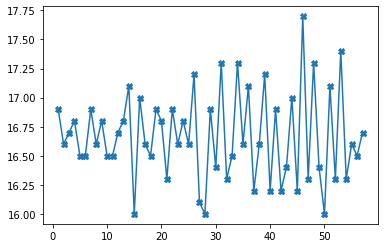

In [33]:
plt.plot(df_result['current_acc_[Majority]'].iloc[1:]*100, marker='X', label='Majority')

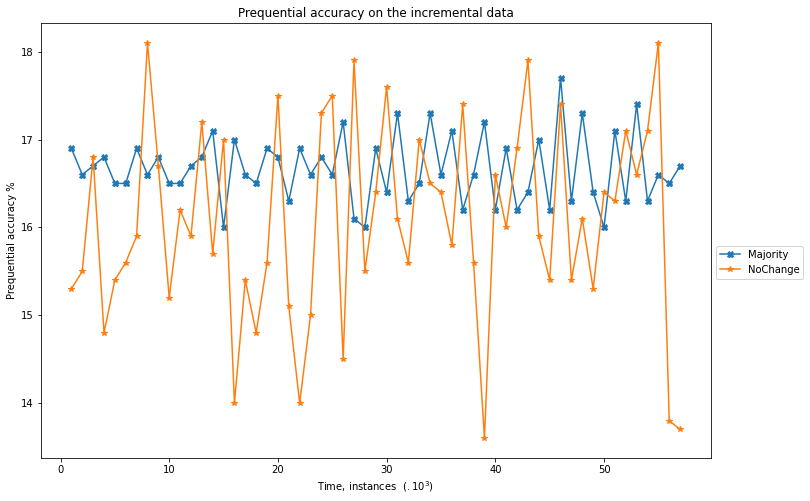

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(12,8))
df_result = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign4\results.csv')

plt.plot(df_result['current_acc_[Majority]'].iloc[1:]*100, marker='X', label='Majority')
plt.plot(df_result['current_acc_[NoChange]'].iloc[1:]*100, marker='*', label='NoChange')

plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Prequential accuracy on the incremental data")
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.savefig('Ques1.png')
plt.show()


Q2: Applying Hoeffding Trees, SAM-KNN, Hoeffding Adaptive Trees,  AdditiveExpertEnsembleClassifier and Adaptive Random Forest classifier on Insects-Incremental-Balanced data

In [43]:
%matplotlib qt5
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import SEAGenerator, ConceptDriftStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier,SAMKNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.meta import DynamicWeightedMajorityClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LearnPPNSEClassifier
from skmultiflow.meta.learn_pp import LearnPPClassifier
from skmultiflow.meta import AdditiveExpertEnsembleClassifier

# Create a stream
stream = DataStream(X,Y)
stream.prepare_for_use()   # Not required for v0.5.0+

# Setup the classifier
ht = HoeffdingTreeClassifier()
hAt = HoeffdingAdaptiveTreeClassifier()
SamKNN = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                          stm_size_option='maxACCApprox', use_ltm=False)
#ensemble-based models
aeec =  AdditiveExpertEnsembleClassifier()
arfc = AdaptiveRandomForestClassifier()

mcc = MajorityClassClassifier()
ncc = NoChangeClassifier()

# Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,pretrain_size=1000, n_wait=1000, batch_size=1,
                                 output_file="results_part2.csv",
                                metrics=['accuracy'])
# Evaluate
#evaluator.evaluate(stream=stream, model=classifier)# Run evaluation
# evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN, lppnse, arfc], model_names=['HT', 'HAT', 'SAMKNN', 'lppnse','arfc'])
evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN,aeec,arfc], model_names=['HT', 'HAT', 'SAMKNN','aeec','ARFC'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [2210.68s]
Processed samples: 57018
Mean performance:
HT - Accuracy     : 0.5228
HAT - Accuracy     : 0.5364
SAMKNN - Accuracy     : 0.5761
aeec - Accuracy     : 0.4744
ARFC - Accuracy     : 0.6448


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_preprune=False, nominal_attributes=None,
                                 random_state=None, remove_poor_atts=False,
                                 split_confidence=1e-07,
                       

In [46]:
plt.figure(figsize=(12,8))
df_result = pd.read_csv(r"E:\uOttawaTerm1\ML\Assign4\results_part2.csv")
# Hoeffding Trees, SAM-KNN, Hoeffding Adaptive Trees and two ensemble models
plt.plot(df_result['current_acc_[HT]'].iloc[1:]*100, marker='+', label='HT')
plt.plot(df_result['current_acc_[SAMKNN]'].iloc[1:]*100, marker='v', label='SAMKNN')
plt.plot(df_result['current_acc_[HAT]'].iloc[1:]*100, marker='D', label='HAT')
plt.plot(df_result['current_acc_[aeec]'].iloc[1:]*100, marker='X', label='aeec')
plt.plot(df_result['current_acc_[ARFC]'].iloc[1:]*100, marker='*', label='ARFC')

plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Prequential accuracy on the incremental data")
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.savefig('Ques2-incremental.png')

Drift Detection Using ADWIN

In [93]:
def drift_detetction_hoeffding_tree(X,Y, window_size = 1000):
    
    ddm = ADWIN()

    X, Y = get_X_Y(df_incremental_d1)
    # Simulating a data stream as a normal distribution of 1's and 0's
    data_stream = DataStream(X,Y)

    pre_train = 1000
    metric_evaluator = WindowClassificationPerformanceEvaluator()
    rem_samples = data_stream.n_remaining_samples()
    print("Pre-training on {} samples".format(pre_train))
    current_count = 0
    #creating model
    hoeff_tree = HoeffdingTreeClassifier()
    x, y = data_stream.next_sample(1000)
    hoeff_tree.partial_fit(x,y)
    
    current_count += 1000
    
    change_detected = []    
    warning_detected = []
    accuracies = []
    hoeff_tree_new = None
    
    while(data_stream.has_more_samples()):
        x, y = data_stream.next_sample()
        current_count += 1
        
        y_pred = hoeff_tree.predict(x)
        
        metric_evaluator.add_result(y, y_pred)
        
        ddm.add_element(0 if y_pred[0] == y[0] else 1)
        
        if ddm.detected_warning_zone(): #Warning Zone
            warning_detected.append(current_count)
            if hoeff_tree_new == None:
                hoeff_tree_new = HoeffdingTreeClassifier()
        if ddm.detected_change(): #Detects concept change in a drifting data stream.
            change_detected.append(current_count)
            print("Change Detected at :",current_count)  
            if hoeff_tree_new != None:
                hoeff_tree = hoeff_tree_new
            ddm.reset() #Reset detectors,Resets statistics and adwin’s window.
            hoeff_tree_new = None
        
        #warning detected but no change detected
        if hoeff_tree_new != None:
            hoeff_tree_new.partial_fit(x, y) 
            
        hoeff_tree.partial_fit(x, y) #retraining 
        
        if current_count % window_size == 0:
            print(current_count,end=" ")
            accuracies.append(metric_evaluator.accuracy_score())
    return accuracies, warning_detected, change_detected

In [94]:
accuracy_incremental, warning_incremental, change_incremental = drift_detetction_hoeffding_tree(X,Y)

Pre-training on 1000 samples
2000 3000 Change Detected at : 3432
4000 5000 6000 7000 Change Detected at : 7528
8000 9000 10000 11000 12000 13000 14000 15000 16000 Change Detected at : 16744
17000 18000 19000 20000 21000 22000 Change Detected at : 22888
23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 Change Detected at : 50312
51000 52000 53000 54000 55000 56000 57000 

In [95]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(accuracy_incremental)), np.array(accuracy_incremental)[1:], label = 'DDM')
change_incremental = np.array(change_incremental)/1000
plt.axvline(x = change_incremental[0], color = 'b', label = 'Change points detected')
for i in change_incremental[1:]:
    plt.axvline(x = i, color = 'b')
plt.legend(bbox_to_anchor=(0.65, -0.15))
plt.title('incremental data')
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.show()

In [96]:
accuracy_incremental_mean= sum (accuracy_incremental)/len(accuracy_incremental)
print(accuracy_incremental_mean)

0.5295535714285715


# For INSECTS-gradual_balanced_norm dataset

In [112]:
X, Y = get_X_Y(df_gradual_d2)

In [113]:
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import SEAGenerator, ConceptDriftStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier,SAMKNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.meta import DynamicWeightedMajorityClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LearnPPNSEClassifier

# Create a stream
stream = DataStream(X,Y)
stream.prepare_for_use()   # Not required for v0.5.0+

# Setup the classifier
mcc = MajorityClassClassifier()
ncc = NoChangeClassifier()

# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=1000, n_wait=1000, batch_size=1,
                                 output_file="results_dataset2_kaggle-ju.csv",
                                metrics=['accuracy'])
# Evaluate
#evaluator.evaluate(stream=stream, model=classifier)# Run evaluation
# evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN, lppnse, arfc], model_names=['HT', 'HAT', 'SAMKNN', 'lppnse','arfc'])
evaluator.evaluate(stream=stream, model=[mcc, ncc], model_names=['Majority','NoChange'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [283.92s]
Processed samples: 24150
Mean performance:
Majority - Accuracy     : 0.1733
NoChange - Accuracy     : 0.3632


In [115]:
plt.figure(figsize=(12,8))
df_result = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign4\results_dataset2_kaggle-ju.csv')

plt.plot(df_result['current_acc_[Majority]'].iloc[1:]*100, marker='X', label='Majority')
plt.plot(df_result['current_acc_[NoChange]'].iloc[1:]*100, marker='*', label='NoChange')

plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Prequential accuracy on the gradual data")
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.savefig('Ques1-dataset2-ju.png')
plt.show()


In [62]:
%matplotlib qt5
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import SEAGenerator, ConceptDriftStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier,SAMKNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.meta import DynamicWeightedMajorityClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LearnPPNSEClassifier
from skmultiflow.meta.learn_pp import LearnPPClassifier
from skmultiflow.meta import AdditiveExpertEnsembleClassifier

# Create a stream
stream = DataStream(X,Y)
stream.prepare_for_use()   # Not required for v0.5.0+

# Setup the classifier
ht = HoeffdingTreeClassifier()
hAt = HoeffdingAdaptiveTreeClassifier()
SamKNN = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                          stm_size_option='maxACCApprox', use_ltm=False)
#ensemble-based models
aeec =  AdditiveExpertEnsembleClassifier()
arfc = AdaptiveRandomForestClassifier()

mcc = MajorityClassClassifier()
ncc = NoChangeClassifier()

# Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,pretrain_size=1000, n_wait=1000, batch_size=1,
                                 output_file="results_part2-dataset2.csv",
                                metrics=['accuracy'])
# Evaluate
#evaluator.evaluate(stream=stream, model=classifier)# Run evaluation
# evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN, lppnse, arfc], model_names=['HT', 'HAT', 'SAMKNN', 'lppnse','arfc'])
evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN,aeec,arfc], model_names=['HT', 'HAT', 'SAMKNN','aeec','ARFC'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [772.51s]
Processed samples: 24150
Mean performance:
HT - Accuracy     : 0.6029
HAT - Accuracy     : 0.6197
SAMKNN - Accuracy     : 0.7378
aeec - Accuracy     : 0.5301
ARFC - Accuracy     : 0.7698


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_preprune=False, nominal_attributes=None,
                                 random_state=None, remove_poor_atts=False,
                                 split_confidence=1e-07,
                       

In [66]:
plt.figure(figsize=(12,8))
df_result = pd.read_csv(r"E:\uOttawaTerm1\ML\Assign4\results_part2-dataset2.csv",header=9)
# Hoeffding Trees, SAM-KNN, Hoeffding Adaptive Trees and two ensemble models
plt.plot(df_result['current_acc_[HT]'].iloc[1:]*100, marker='+', label='HT')
plt.plot(df_result['current_acc_[SAMKNN]'].iloc[1:]*100, marker='v', label='SAMKNN')
plt.plot(df_result['current_acc_[HAT]'].iloc[1:]*100, marker='D', label='HAT')
plt.plot(df_result['current_acc_[aeec]'].iloc[1:]*100, marker='X', label='aeec')
plt.plot(df_result['current_acc_[ARFC]'].iloc[1:]*100, marker='*', label='ARFC')

plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Prequential accuracy on the gradual data")
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.savefig('Ques2-d2-gradual.png')
plt.show()

In [104]:
def drift_detetction_hoeffding_tree(X,Y, window_size = 1000):
    
    ddm = ADWIN()

    X, Y = get_X_Y(df_gradual_d2)
    # Simulating a data stream as a normal distribution of 1's and 0's
    data_stream = DataStream(X,Y)

    pre_train = 1000
    metric_evaluator = WindowClassificationPerformanceEvaluator()
    rem_samples = data_stream.n_remaining_samples()
    print("Pre-training on {} samples".format(pre_train))
    current_count = 0
    hoeff_tree = HoeffdingTreeClassifier()
    x, y = data_stream.next_sample(1000)
    hoeff_tree.partial_fit(x,y)
    current_count += 1000
    change_detected = []    
    warning_detected = []
    accuracies = []
    hoeff_tree_new = None
    while(data_stream.has_more_samples()):
        x, y = data_stream.next_sample()
        current_count += 1
        
        y_pred = hoeff_tree.predict(x)
        metric_evaluator.add_result(y, y_pred)
        ddm.add_element(0 if y_pred[0] == y[0] else 1)
        
        if ddm.detected_warning_zone():
            warning_detected.append(current_count)
            if hoeff_tree_new == None:
                hoeff_tree_new = HoeffdingTreeClassifier()
        if ddm.detected_change():
            change_detected.append(current_count)
            print("Change Detected at :",current_count)
            if hoeff_tree_new != None:
                hoeff_tree = hoeff_tree_new
            ddm.reset()
            hoeff_tree_new = None
        
        if hoeff_tree_new != None:
            hoeff_tree_new.partial_fit(x, y) 
            
        hoeff_tree.partial_fit(x, y)
        
        if current_count % window_size == 0:
            print(current_count,end=" ")
            accuracies.append(metric_evaluator.accuracy_score())
    return accuracies, warning_detected, change_detected

In [105]:
accuracy_gradual, warning_gradual, change_gradual = drift_detetction_hoeffding_tree(X,Y)

Pre-training on 1000 samples
2000 3000 4000 Change Detected at : 4104
5000 6000 7000 8000 9000 10000 11000 12000 Change Detected at : 12808
13000 Change Detected at : 13960
14000 Change Detected at : 14344
15000 16000 17000 Change Detected at : 17224
18000 19000 20000 21000 22000 23000 Change Detected at : 23368
24000 

In [106]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(accuracy_gradual)), np.array(accuracy_gradual)[1:], label = 'DDM')
change_incremental = np.array(change_gradual)/1000
plt.axvline(x = change_gradual[0], color = 'b',linestyle='dashed', label = 'Change points detected')
for i in change_gradual[1:]:
    plt.axvline(x = i, color = 'b')
plt.legend(bbox_to_anchor=(0.65, -0.15))
plt.title('Abrupt data')
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.show()

In [107]:
accuracy_gradual_mean= sum (accuracy_gradual)/len(accuracy_gradual)
print(accuracy_gradual_mean)

0.5982608695652175


# For INSECTS-abrupt_balanced_norm dataset

In [116]:
X, Y = get_X_Y(df_abrupt_d3)

In [117]:
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import SEAGenerator, ConceptDriftStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier,SAMKNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.meta import DynamicWeightedMajorityClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LearnPPNSEClassifier

# Create a stream
stream = DataStream(X,Y)
stream.prepare_for_use()   # Not required for v0.5.0+

# Setup the classifier
mcc = MajorityClassClassifier()
ncc = NoChangeClassifier()

# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=1000, n_wait=1000, batch_size=1,
                                 output_file="Ques1-abrupt.csv",
                                metrics=['accuracy'])
# Evaluate
#evaluator.evaluate(stream=stream, model=classifier)# Run evaluation
# evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN, lppnse, arfc], model_names=['HT', 'HAT', 'SAMKNN', 'lppnse','arfc'])
evaluator.evaluate(stream=stream, model=[mcc, ncc], model_names=['Majority','NoChange'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [1541.40s]
Processed samples: 52848
Mean performance:
Majority - Accuracy     : 0.1691
NoChange - Accuracy     : 0.2923


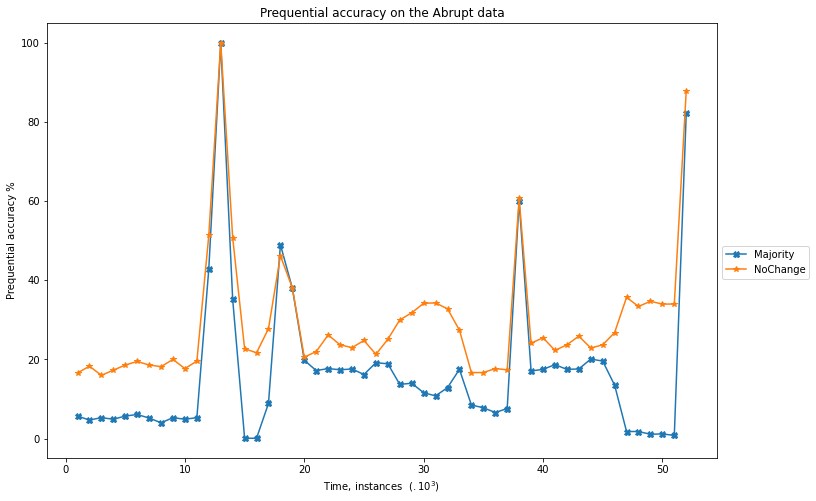

In [7]:
plt.figure(figsize=(12,8))
df_result = pd.read_csv(r"E:\uOttawaTerm1\ML\Assign4\Ques1-abrupt.csv")

plt.plot(df_result['current_acc_[Majority]'].iloc[1:]*100, marker='X', label='Majority')
plt.plot(df_result['current_acc_[NoChange]'].iloc[1:]*100, marker='*', label='NoChange')

plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Prequential accuracy on the Abrupt data")
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.savefig('Ques1-dataset3.png')
plt.show()


In [89]:
%matplotlib qt5
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import SEAGenerator, ConceptDriftStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import KNNClassifier,SAMKNNClassifier
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream
from skmultiflow.meta import DynamicWeightedMajorityClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LearnPPNSEClassifier
from skmultiflow.meta.learn_pp import LearnPPClassifier
from skmultiflow.meta import AdditiveExpertEnsembleClassifier

# Create a stream
stream = DataStream(X,Y)
stream.prepare_for_use()   # Not required for v0.5.0+

# Setup the classifier
ht = HoeffdingTreeClassifier()
hAt = HoeffdingAdaptiveTreeClassifier()
SamKNN = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                          stm_size_option='maxACCApprox', use_ltm=False)
#ensemble-based models
aeec =  AdditiveExpertEnsembleClassifier()
arfc = AdaptiveRandomForestClassifier()

mcc = MajorityClassClassifier()
ncc = NoChangeClassifier()

# Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,pretrain_size=1000, n_wait=1000, batch_size=1,
                                 output_file="results-abrupt-3.csv",
                                metrics=['accuracy'])
# Evaluate
#evaluator.evaluate(stream=stream, model=classifier)# Run evaluation
# evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN, lppnse, arfc], model_names=['HT', 'HAT', 'SAMKNN', 'lppnse','arfc'])
evaluator.evaluate(stream=stream, model=[ht, hAt, SamKNN,aeec,arfc], model_names=['HT', 'HAT', 'SAMKNN','aeec','ARFC'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [1875.08s]
Processed samples: 52848
Mean performance:
HT - Accuracy     : 0.5367
HAT - Accuracy     : 0.6031
SAMKNN - Accuracy     : 0.6970
aeec - Accuracy     : 0.5051
ARFC - Accuracy     : 0.7475


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_preprune=False, nominal_attributes=None,
                                 random_state=None, remove_poor_atts=False,
                                 split_confidence=1e-07,
                       

In [92]:
plt.figure(figsize=(12,8))
df_result = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign4\results-abrupt-3.csv')
# Hoeffding Trees, SAM-KNN, Hoeffding Adaptive Trees and two ensemble models
plt.plot(df_result['current_acc_[HT]'].iloc[1:]*100, marker='+', label='HT')
plt.plot(df_result['current_acc_[SAMKNN]'].iloc[1:]*100, marker='v', label='SAMKNN')
plt.plot(df_result['current_acc_[HAT]'].iloc[1:]*100, marker='D', label='HAT')
plt.plot(df_result['current_acc_[aeec]'].iloc[1:]*100, marker='X', label='aeec')
plt.plot(df_result['current_acc_[ARFC]'].iloc[1:]*100, marker='*', label='ARFC')

plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("Prequential accuracy on the abrupt data")
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.savefig('Ques2.png')
plt.show()

In [108]:
def drift_detetction_hoeffding_tree(X,Y, window_size = 1000):
    
    ddm = ADWIN()

    X, Y = get_X_Y(df_abrupt_d3)
    # Simulating a data stream as a normal distribution of 1's and 0's
    data_stream = DataStream(X,Y)

    pre_train = 1000
    metric_evaluator = WindowClassificationPerformanceEvaluator()
    rem_samples = data_stream.n_remaining_samples()
    print("Pre-training on {} samples".format(pre_train))
    current_count = 0
    hoeff_tree = HoeffdingTreeClassifier()
    x, y = data_stream.next_sample(1000)
    hoeff_tree.partial_fit(x,y)
    current_count += 1000
    change_detected = []    
    warning_detected = []
    accuracies = []
    hoeff_tree_new = None
    while(data_stream.has_more_samples()):
        x, y = data_stream.next_sample()
        current_count += 1
        
        y_pred = hoeff_tree.predict(x)
        metric_evaluator.add_result(y, y_pred)
        ddm.add_element(0 if y_pred[0] == y[0] else 1)
        
        if ddm.detected_warning_zone():
            warning_detected.append(current_count)
            if hoeff_tree_new == None:
                hoeff_tree_new = HoeffdingTreeClassifier()
        if ddm.detected_change():
            change_detected.append(current_count)
            print("Change Detected at :",current_count)
            if hoeff_tree_new != None:
                hoeff_tree = hoeff_tree_new
            ddm.reset()
            hoeff_tree_new = None
        
        if hoeff_tree_new != None:
            hoeff_tree_new.partial_fit(x, y) 
            
        hoeff_tree.partial_fit(x, y)
        
        if current_count % window_size == 0:
            print(current_count,end=" ")
            accuracies.append(metric_evaluator.accuracy_score())
    return accuracies, warning_detected, change_detected

In [109]:
accuracy_abrupt, warning_abrupt, change_abrupt = drift_detetction_hoeffding_tree(X,Y)

Pre-training on 1000 samples
2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 Change Detected at : 13800
14000 Change Detected at : 14408
15000 16000 Change Detected at : 16744
17000 18000 19000 Change Detected at : 19016
20000 Change Detected at : 20808
21000 22000 23000 24000 25000 26000 27000 28000 Change Detected at : 28232
29000 Change Detected at : 29032
30000 31000 32000 33000 Change Detected at : 33448
34000 35000 36000 37000 Change Detected at : 37800
38000 Change Detected at : 38376
Change Detected at : 38856
39000 40000 41000 Change Detected at : 41096
42000 43000 Change Detected at : 43912
44000 45000 46000 47000 Change Detected at : 47368
48000 49000 50000 Change Detected at : 50600
51000 52000 Change Detected at : 52136
Change Detected at : 52584


In [110]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(accuracy_abrupt)), np.array(accuracy_abrupt)[1:], label = 'DDM')
change_incremental = np.array(change_incremental)/1000
plt.axvline(x = change_abrupt[0], color = 'b',linestyle='dashed', label = 'Change points detected')
for i in change_incremental[1:]:
    plt.axvline(x = i, color = 'b')
plt.legend(bbox_to_anchor=(0.65, -0.15))
plt.title('Abrupt data')
plt.xlabel('Time, instances  $(.10^3)$')
plt.ylabel("Prequential accuracy %")
plt.show()

In [111]:
accuracy_abrupt_mean= sum (accuracy_abrupt)/len(accuracy_abrupt)
print(accuracy_abrupt_mean)

0.5373529411764706
